In [1]:
import numpy as np
import cv2
import os
import json
import utils
import matplotlib.pyplot as plt

In [2]:
#input_directory = r'images\processed\non_cropped\\'
#target_directory = r'output\session_1\grabCut\\'

input_directory = r'images\processed\session_3\\'
target_directory = r'output\session_3\definite_vs_probable_BGD\\'

images_name = []

for name in os.listdir(input_directory):
    if name.endswith(".jpg"):
        images_name.append(name)

images = {}

for name in images_name:
    images[name] = cv2.imread(input_directory + name)

bboxes = json.loads(open(input_directory + "images_bboxes.json", "r").read())

In [3]:
def applyGrabCutAndWriteOutputs(image, bbox, name, num):
    _, outputMask0 = utils.grabCut(image, bbox)
    output = cv2.bitwise_and(image, image, mask=outputMask0)
    cv2.imwrite(target_directory + f'{name}_{num}_BBOX.jpg', output)
    
    mask = utils.bboxToMask(image, bbox, cv2.GC_BGD)
    
    maskshow = mask.copy().astype("uint8")
    maskshow[maskshow > 2] = 255
    maskshow[maskshow <= 2] = 0
    
    plt.imshow(maskshow, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    _, outputMask1 = utils.grabCut(image, mask, mode = 'MASK')
    output = cv2.bitwise_and(image, image, mask=outputMask1)
    cv2.imwrite(target_directory + f'{name}_{num}_definite_BGD.jpg', output)
    
    mask = utils.bboxToMask(image, bbox, cv2.GC_PR_BGD)
    
    maskshow = mask.copy().astype("uint8")
    maskshow[maskshow > 2] = 255
    maskshow[maskshow <= 2] = 127
    plt.imshow(maskshow, cmap='gray', vmin=0, vmax=255)
    plt.show()
    
    _, outputMask2 = utils.grabCut(image, mask, mode = 'MASK')
    output = cv2.bitwise_and(image, image, mask=outputMask2)
    cv2.imwrite(target_directory + f'{name}_{num}_probable_BGD.jpg', output)
    
    print(np.array_equal(outputMask0, outputMask1))
    print(np.array_equal(outputMask1, outputMask2))

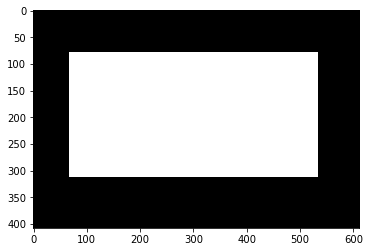

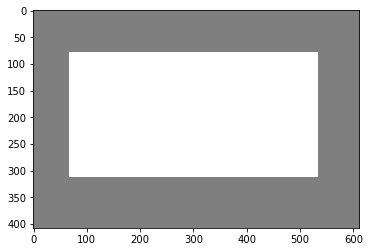

True
False


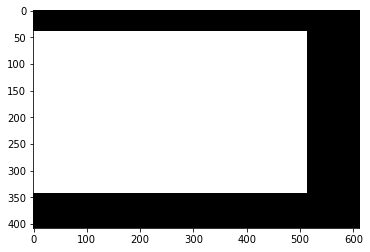

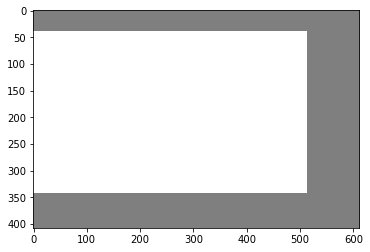

True
False


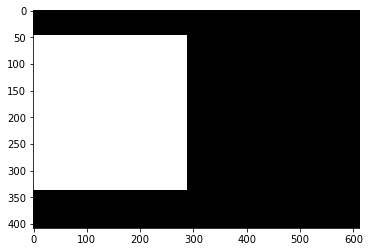

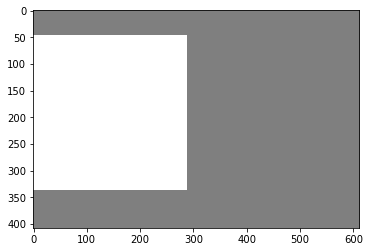

True
False


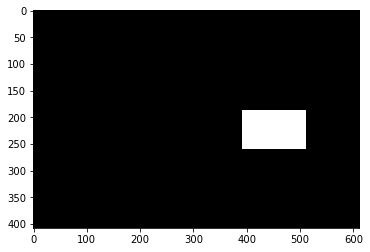

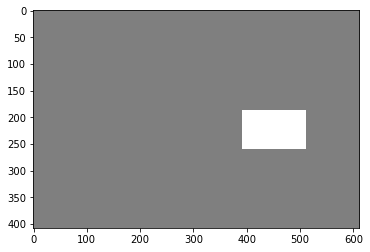

True
False


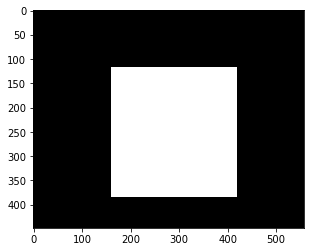

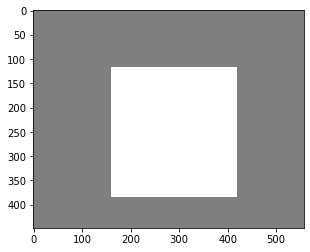

True
False


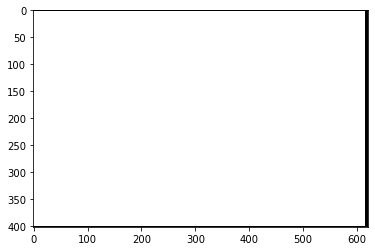

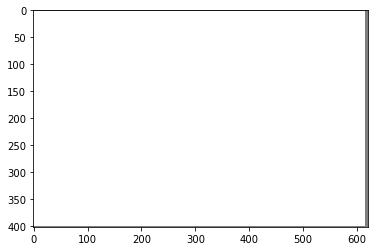

True
False


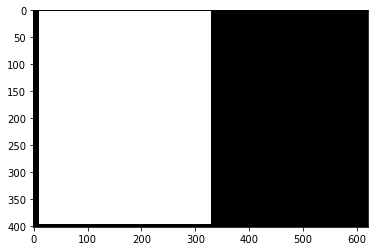

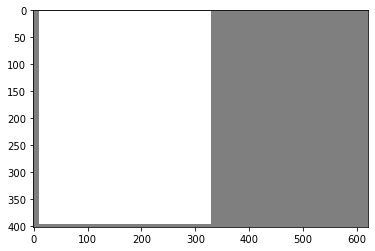

True
False


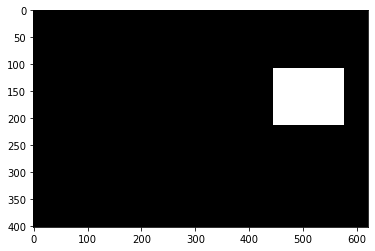

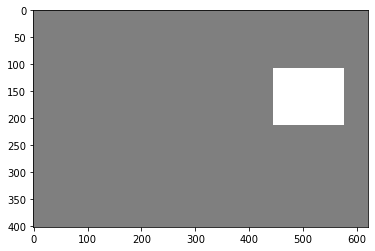

True
False


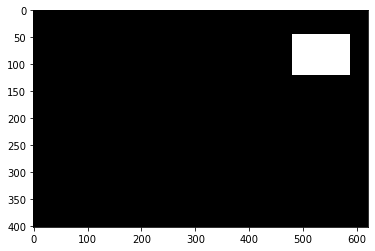

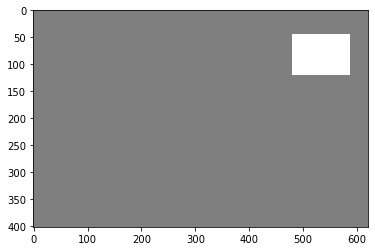

True
False


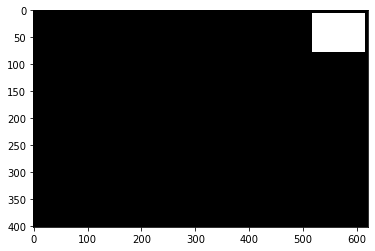

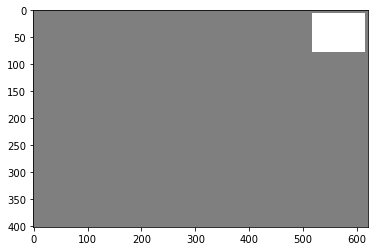

True
False


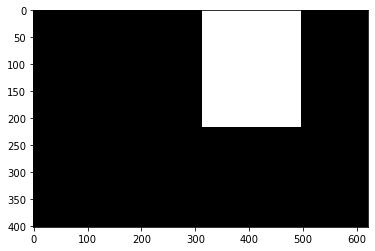

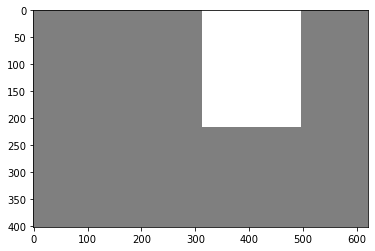

True
False


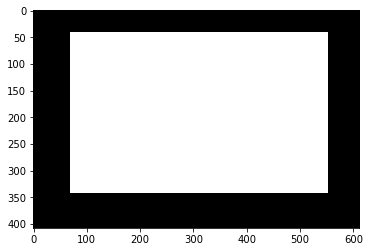

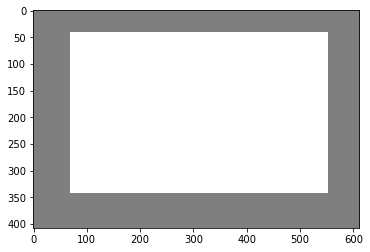

True
False


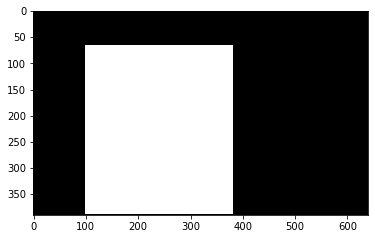

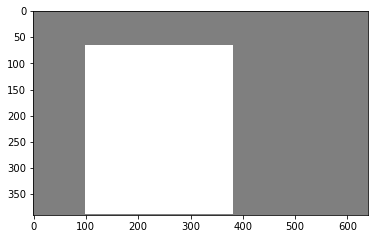

True
False


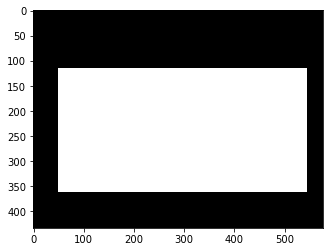

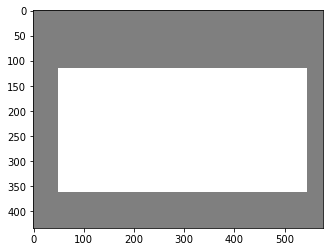

True
False


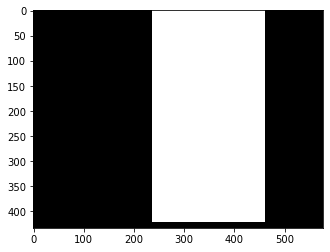

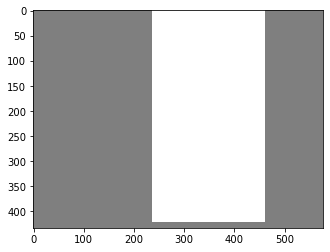

True
False


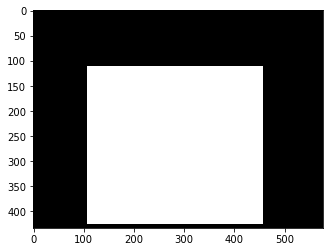

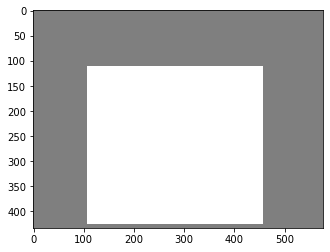

True
False


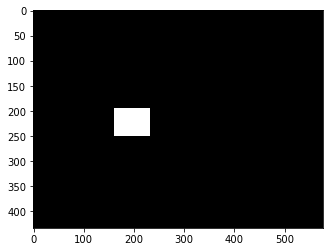

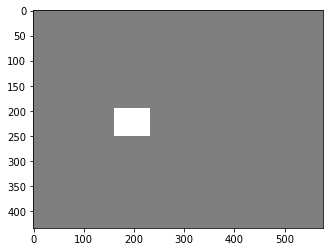

True
False


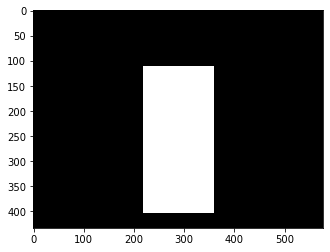

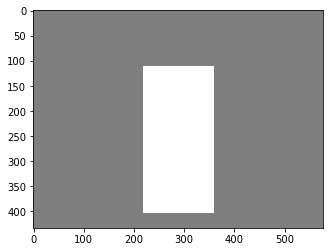

True
False


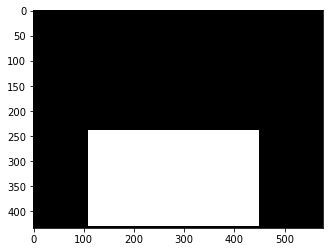

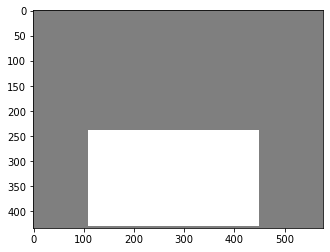

True
False


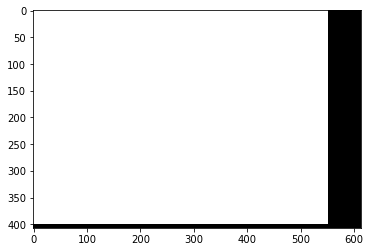

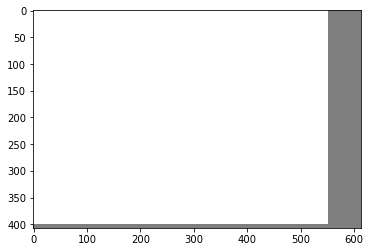

True
False


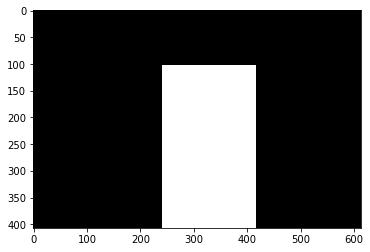

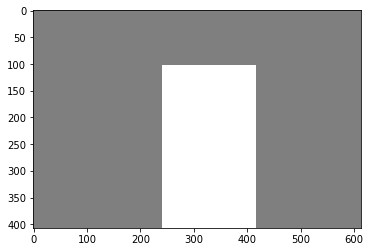

True
False


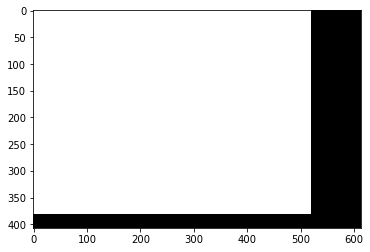

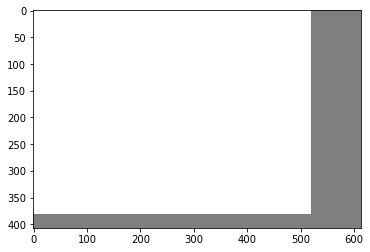

True
False


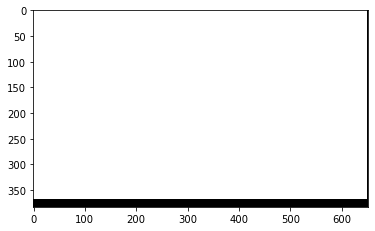

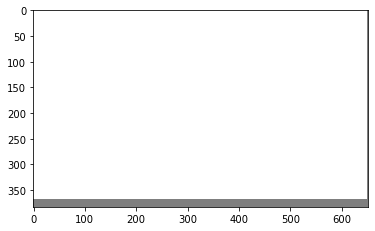

True
False


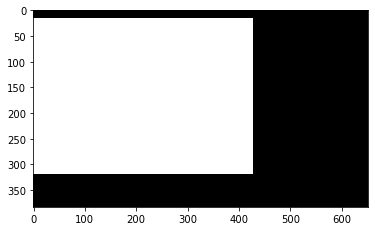

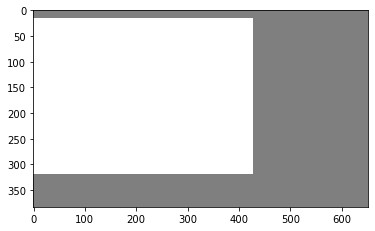

True
False


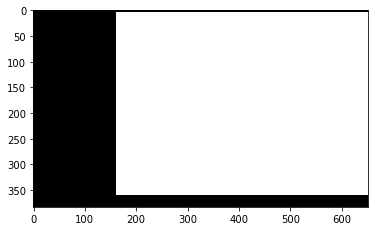

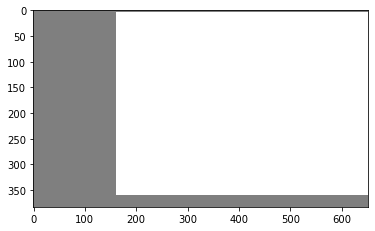

True
False


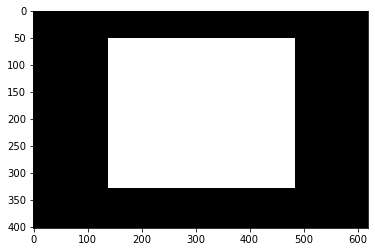

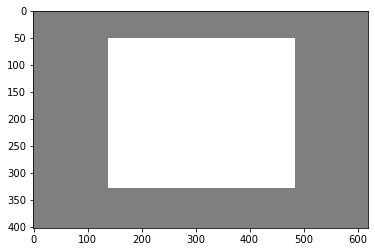

True
False


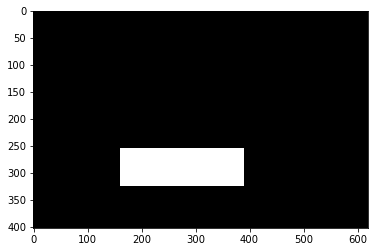

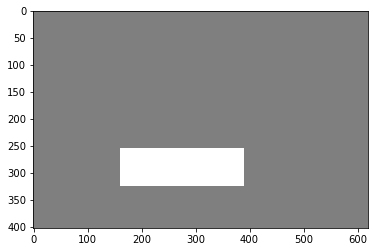

True
False


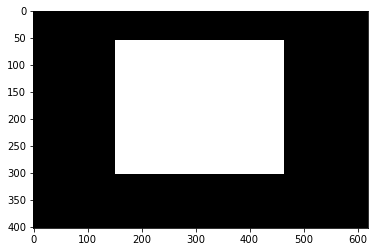

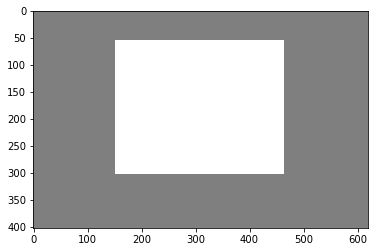

True
False


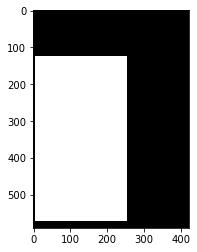

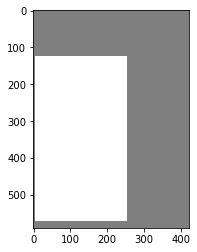

True
False


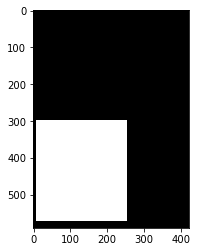

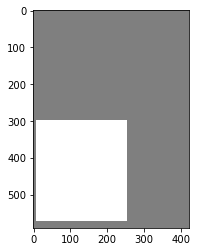

True
False


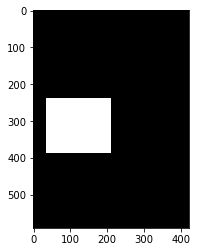

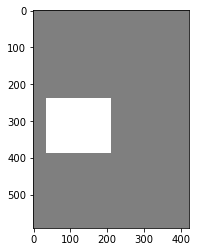

True
False


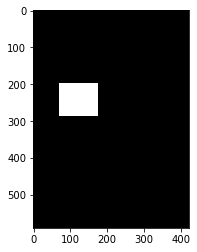

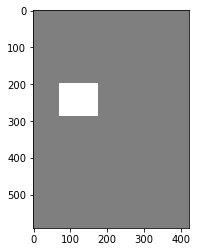

True
False


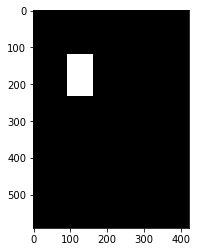

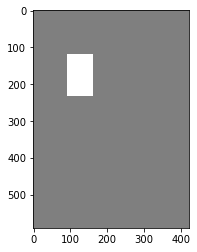

True
False


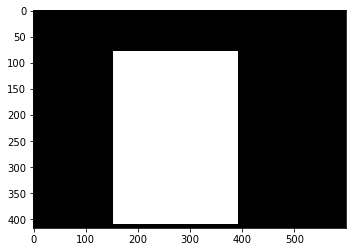

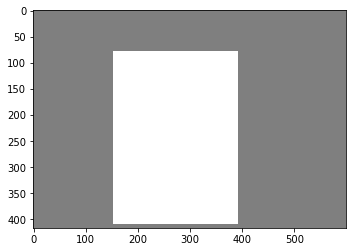

True
False


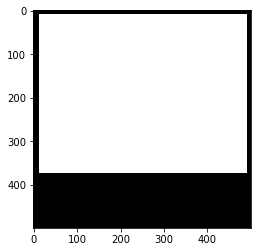

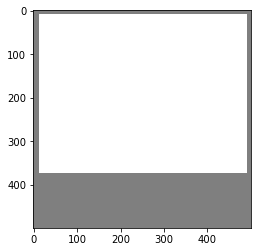

True
False


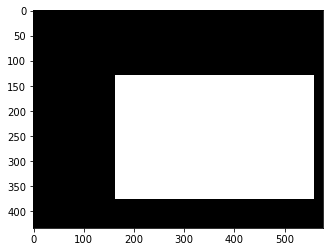

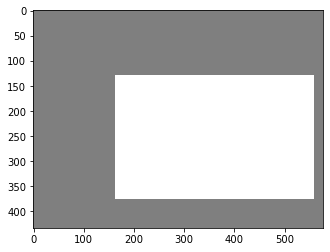

True
False


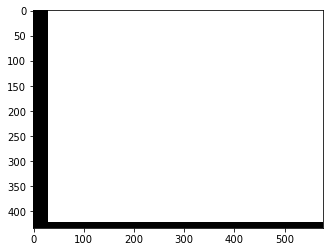

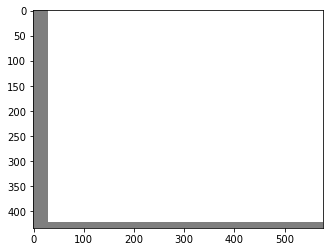

True
False


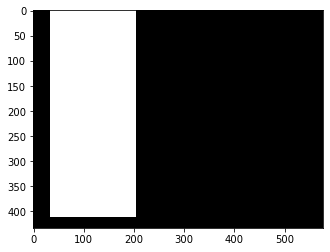

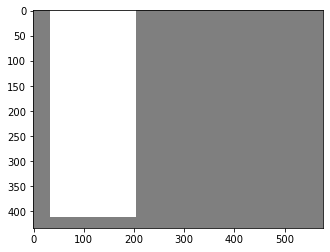

True
False


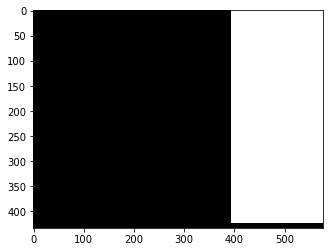

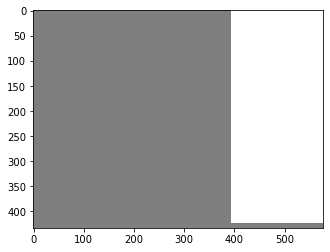

True
False


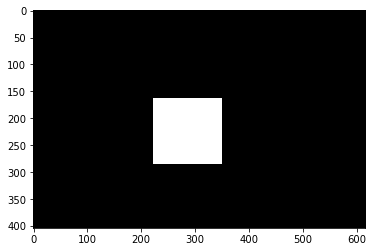

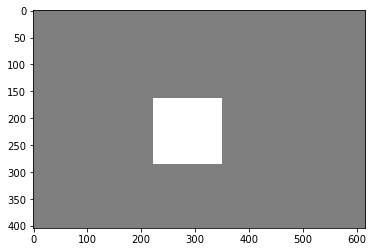

True
False


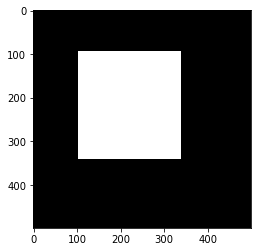

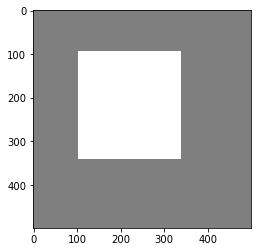

True
False


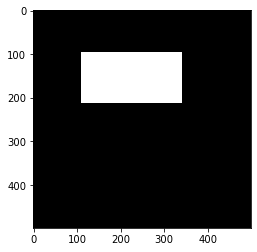

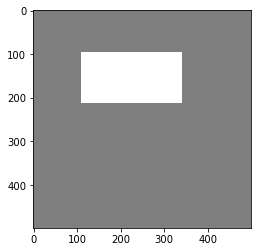

True
False


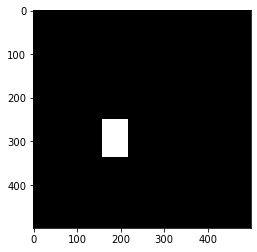

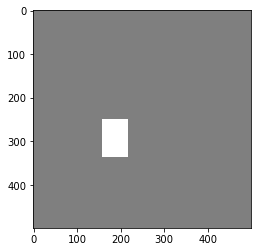

True
False


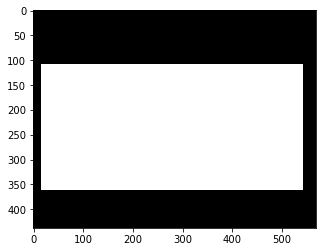

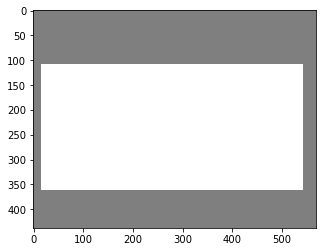

True
False


In [4]:
for name in images_name:
    image = images[name]
    bbox = bboxes[name]
    for i in range(len(bbox)):
        applyGrabCutAndWriteOutputs(image, bbox[i], name[:-4], i+1)

image = images['cat.jpg']
bbox = utils.boundingBox(image)
_, outputMask1 = utils.grabCut(image, bbox, definite = False)
output = cv2.bitwise_and(image, image, mask=outputMask1)
cv2.imshow('mytitle', output)
cv2.waitKey(0)
cv2.destroyAllWindows()